# Detecting and Treating Outliers
## Treating the odd one out

### What are Outliers? 🤔

We all have heard of the idiom 'odd one out' which means something unusual in comparison to the others in a group.

Similarly, an Outlier is an observation in a given dataset that lies far from the rest of the observations. That means an outlier is vastly larger or smaller than the remaining values in the set.

### Why do they occur?

An outlier may occur due to the variability in the data, or due to experimental error/human error. They may indicate an experimental error or heavy skewness in the data(heavy-tailed distribution).

### What do they affect?

In statistics, we have three measures of central tendency namely Mean, Median, and Mode. They help us describe the data.

- Mean is the accurate measure to describe the data when we do not have any outliers present.
- Median is used if there is an outlier in the dataset.
- Mode is used if there is an outlier AND about ½ or more of the data is the same.

'Mean' is the only measure of central tendency that is affected by the outliers which in turn impacts Standard deviation.

In [1]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Let's take an example and check if it affects the Mean.

In [2]:
sample = np.array([15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9])
sample

array([ 15, 101,  18,   7,  13,  16,  11,  21,   5,  15,  10,   9])

By just looking at the sample values, we can say the datapoint 101 is an outlier. 

In [3]:
# Computing mesaures of central tendency, dispersion with outlier

# Defining a function
def measures(data):
    print("Mean: ", data.mean())
    print("Median: ", np.median(data))
    print("Mode: ", stats.mode(data)[0])
    print("Variance: ", np.var(data))
    print("Std dev: ", np.std(data))
    
# Driver code
measures(sample)

Mean:  20.083333333333332
Median:  14.0
Mode:  [15]
Variance:  614.7430555555555
Std dev:  24.794012494059036


Remove the outlier for a while and again compute the measure of central tendency, dispersion

In [4]:
x = np.delete(sample, np.where(sample==101)) # copy the sample array to x without the outlier

# Driver code for measures function
measures(x)

Mean:  12.727272727272727
Median:  13.0
Mode:  [15]
Variance:  21.28925619834711
Std dev:  4.614028196527099


Conclusion: By comparing both the computations, we conclude Mean is more affected than the median.

#### Graphical visualisations to understand the data distribution

Skewness:  2.8446757484796286


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Sample')

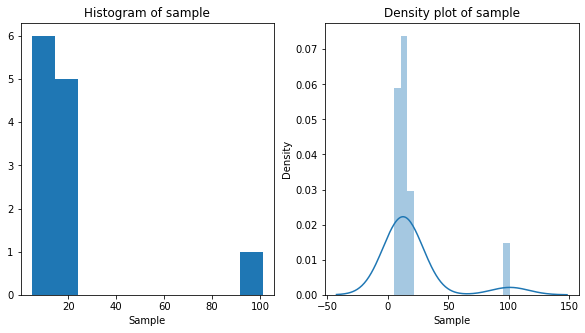

In [5]:
# with outlier
print("Skewness: ", stats.skew(sample))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(sample)
plt.title("Histogram of sample")
plt.xlabel('Sample')
plt.subplot(1,2,2)
sns.distplot(sample, kde=True)
plt.title('Density plot of sample')
plt.xlabel('Sample')

Skewness:  0.041485935980599055


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'x')

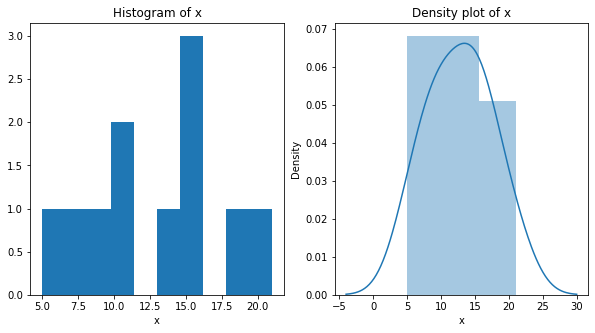

In [6]:
# without outlier
print("Skewness: ", stats.skew(x))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(x)
plt.title("Histogram of x")
plt.xlabel('x')
plt.subplot(1,2,2)
sns.distplot(x, kde=True)
plt.title('Density plot of x')
plt.xlabel('x')

Skewness of sample is 2.8 which indicates the data are highly skewed. The graphical representations add to our analysis.

### Detecting Outliers

If our dataset is small, we can detect the outlier by just looking at the dataset. But what if we have a huge dataset, how do we identify the outliers then? We need to use visualization and mathematical techniques.

Below are some of the techniques of detecting outliers
- Boxplots
- Z-score
- Inter Quantile Range(IQR)

#### Detecting outliers using Boxplot

Text(0.5, 0, 'Sample')

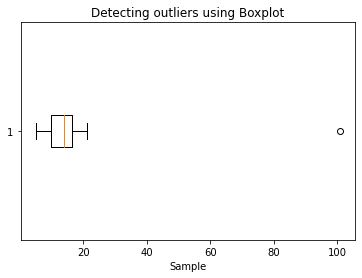

In [7]:
plt.boxplot(sample, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

In the above boxplot, the datapoint 101 is far away from the rest of the data points and is clearly an outlier.

#### Detecting outliers using the Z-scores

Criteria: any data point whose Z-score falls out of 3rd standard deviation is an outlier.

In [8]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

# Driver code
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [101]


#### Detecting outliers using the Inter Quantile Range(IQR)

Criteria: data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers.

steps: 
- Sort the dataset in ascending order
- calculate the 1st and 3rd quartiles(Q1, Q3)
- compute IQR=Q3-Q1
- compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR)
- loop through the values of the dataset and check for those who fall below the lower bound and above the upper bound and mark them as outliers

In [9]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

# Driver code
sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [101]


### Handling Outliers

Till now we learned about finding the outliers. The main question is WHAT do we do with the outliers?

Below are some of the methods of treating the outliers
- Trimming/removing the outlier
- Quantile based flooring and capping
- Mean/Median imputation

#### Trimming/Remove the outliers

In this technique, we remove the outliers from the dataset. Although its not a good practice to follow.

In [10]:
# Trimming
# here sample_outliers = [101]
for i in sample_outliers:
    a = np.delete(sample, np.where(sample==i)) # removing the outlier and copying the rest of the elements to 'a'
print(a)
# print(len(sample), len(a))

[15 18  7 13 16 11 21  5 15 10  9]


The outlier 101 is removed. len(a) is 11.

#### Quantile based flooring and capping

In this technique, the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value.

In [11]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
# print(tenth_percentile, ninetieth_percentile)

b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
# print("Sample:", sample)
print("New array:",b)

New array: [15.  20.7 18.   7.2 13.  16.  11.  20.7  7.2 15.  10.   9. ]


#### Mean/Median imputation

As the mean value is highly influenced by the outliers, it is advised to replace the outliers with median value.

In [12]:
median = np.median(sample)
median

14.0

In [13]:
# Replace with median
for i in sample_outliers:
    c = np.where(sample==i, 14, sample)
print("Sample: ", sample)
print("New array: ",c)
# print(x.dtype)

Sample:  [ 15 101  18   7  13  16  11  21   5  15  10   9]
New array:  [15 14 18  7 13 16 11 21  5 15 10  9]


The outlier 101 is replaced by the median value 14.

### Visualizing the data after treating the data


Text(0.5, 0, 'Sample')

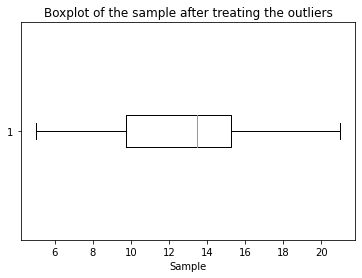

In [14]:
plt.boxplot(c, vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample")

Finally, we are done with detecting and treating the outliers.

In [15]:
!pip install jovian --upgrade --quiet

In [16]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="outlier-treatment")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
